In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


170498071/170498071 [==============================] - 17s 0us/step


In [3]:
INPUT_SHAPE = (32, 32, 3)
# Model 
base_model = Sequential()

# 3 block vgg style model 
# Base of the model

# block1
base_model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = INPUT_SHAPE))
base_model.add(BatchNormalization())
base_model.add(Conv2D(32,3,activation='relu',padding='same'))
base_model.add(BatchNormalization())
base_model.add(MaxPool2D(2))
base_model.add(Dropout(0.25))      # Add dropout to reduce overfitting

# block 2
base_model.add(Conv2D(64,3,activation='relu',padding='same'))
base_model.add(BatchNormalization())
base_model.add(Conv2D(64,3,activation='relu',padding='same'))
base_model.add(BatchNormalization())
base_model.add(MaxPool2D(2))
base_model.add(Dropout(0.25))      # Add dropout to reduce overfitting

# block 3
base_model.add(Conv2D(128,3,activation='relu',padding='same'))
base_model.add(BatchNormalization())
base_model.add(Conv2D(128,3,activation='relu',padding='same'))
base_model.add(BatchNormalization())
base_model.add(MaxPool2D(2))
base_model.add(Dropout(0.25))      # Add dropout to reduce overfitting


# Head of the model
base_model.add(Flatten())
base_model.add(Dense(128,activation='relu'))
base_model.add(BatchNormalization())
base_model.add(Dropout(0.25))      # Add dropout to reduce overfitting
base_model.add(Dense(10,activation='softmax'))


# compile
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01,momentum=0.9)
METRICS = ['accuracy',
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),]

base_model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=METRICS)
# # datagen = ImageDataGenerator(rotation_range=10,
# #                              horizontal_flip=True,
# #                              width_shift_range=0.1,
# #                              height_shift_range=0.1
# #                             )
# datagen = ImageDataGenerator(
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')
# train_gen = datagen.flow(x_train,y_train,batch_size=64)
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

history = base_model.fit(train_generator, 
              epochs=100,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_test), 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )


# history = base_model.fit(train_gen,
#                           steps_per_epoch = int(x_train.shape[0] // 64),
#                           validation_data = (x_test,y_test),
#                           epochs = 50,
#                           #callbacks=[early_stoping],
#                           #verbose = 2
#                              )


Epoch 1/100


2024-01-09 18:45:04.765287: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1562/1562 [==============================] - 34s 19ms/step - loss: 1.6460 - accuracy: 0.4060 - precision: 0.5731 - recall: 0.2093 - val_loss: 2.0741 - val_accuracy: 0.3821 - val_precision: 0.4454 - val_recall: 0.2803
Epoch 2/100
1562/1562 [==============================] - 28s 18ms/step - loss: 1.3177 - accuracy: 0.5250 - precision: 0.6779 - recall: 0.3569 - val_loss: 1.1267 - val_accuracy: 0.5918 - val_precision: 0.7186 - val_recall: 0.4569
Epoch 3/100
1562/1562 [==============================] - 28s 18ms/step - loss: 1.1520 - accuracy: 0.5886 - precision: 0.7237 - recall: 0.4456 - val_loss: 1.5487 - val_accuracy: 0.5123 - val_precision: 0.5961 - val_recall: 0.4290
Epoch 4/100
1562/1562 [==============================] - 28s 18ms/step - loss: 1.0314 - accuracy: 0.6376 - precision: 0.7578 - recall: 0.5158 - val_loss: 0.8514 - val_accuracy: 0.7032 - val_precision: 0.7968 - val_recall: 0.6112
Epoch 5/100
1562/1562 [==============================] - 28s 18ms/step - loss: 0.9486 - accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.8626 - precision: 0.8919 - recall: 0.8438
Test accuracy: 86.26%


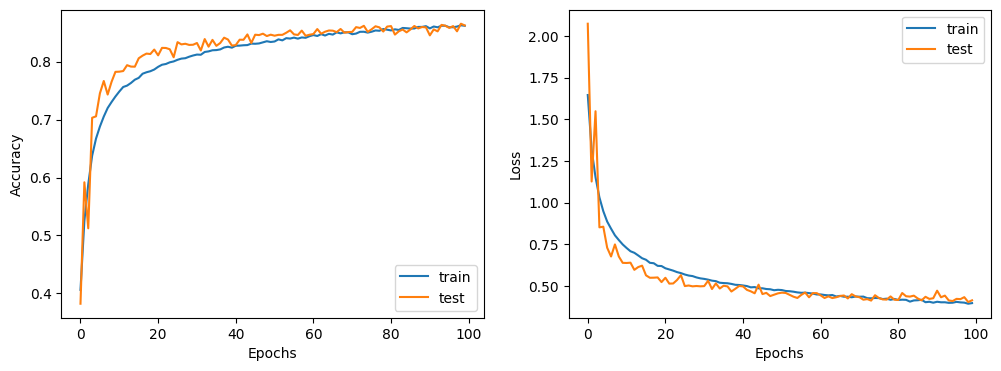

In [6]:
# Evaluate the model
test_loss, test_acc,_,_ = base_model.evaluate(x_test, y_test)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

# Visualize the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the model
base_model.save('models/cnn_model.h5')